#1. Data Preprocessing

## Download and Parse the CoDEx Dataset

In [1]:
!git clone https://github.com/tsafavi/codex
%cd codex
!./extract.sh en  # unzip all KG text in English
!pip install -r requirements.txt
!pip install -e .

Streaming output truncated to the last 5000 lines.
  inflating: data/entities/en/extracts/Q79580.txt  
 extracting: data/entities/en/extracts/Q456002.txt  
  inflating: data/entities/en/extracts/Q1822094.txt  
  inflating: data/entities/en/extracts/Q245817.txt  
  inflating: data/entities/en/extracts/Q55760.txt  
  inflating: data/entities/en/extracts/Q97926.txt  
  inflating: data/entities/en/extracts/Q366054.txt  
  inflating: data/entities/en/extracts/Q650792.txt  
  inflating: data/entities/en/extracts/Q70478.txt  
  inflating: data/entities/en/extracts/Q91589.txt  
  inflating: data/entities/en/extracts/Q182952.txt  
  inflating: data/entities/en/extracts/Q469735.txt  
  inflating: data/entities/en/extracts/Q387370.txt  
  inflating: data/entities/en/extracts/Q445304.txt  
  inflating: data/entities/en/extracts/Q129883.txt  
  inflating: data/entities/en/extracts/Q118570.txt  
  inflating: data/entities/en/extracts/Q164227.txt  
  inflating: data/entities/en/extracts/Q230299.txt  

In [2]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd

from codex.codex import Codex

In [3]:
codex = Codex(code="en", size="s")

In [4]:
train = codex._load_triples('train')
valid = codex._load_triples('valid')
valid_neg = codex._load_triples('valid_negatives')
test = codex._load_triples('test')
test_neg = codex._load_triples('test_negatives')

In [5]:
train.shape, valid.shape, valid_neg.shape, test.shape, test_neg.shape

((32888, 3), (1827, 3), (1827, 3), (1828, 3), (1828, 3))

In [6]:
print("Train \n",train.head())
print("Valid \n",valid.head())
print("Valid Neg \n",valid_neg.head())

Train 
       head relation      tail
0    Q7604    P1412      Q188
1   Q78608     P509    Q12078
2     Q739     P463   Q656801
3  Q192279    P1412     Q7737
4      Q55     P463  Q1969730
Valid 
       head relation       tail
0     Q928     P530        Q41
1  Q443897     P101    Q207628
2    Q1014     P530       Q148
3  Q187019     P106  Q18844224
4     Q148     P530        Q31
Valid Neg 
       head relation    tail
0  Q185724      P27     Q27
1  Q202878     P119     Q64
2  Q160640      P20   Q3033
3  Q105875      P27     Q38
4  Q230068    P3373  Q41166


## Extract Entities Descriptions

In [7]:
arr = {'head':'Q928', 'relation':'P530','tail':'Q41'}
for entity in arr:
  print(entity)
  print(codex.entity_extract(arr[entity]))
  print()

print(codex._load_entities()['Q928'])
print(codex._load_relations()['P530'])
print(codex._load_entities()['Q41'])

head
The Philippines ( (listen); Filipino: Pilipinas [ˌpɪlɪˈpinɐs] or Filipinas [ˌfɪlɪˈpinɐs]), officially the Republic of the Philippines (Filipino: Republika ng Pilipinas), is an archipelagic country in Southeast Asia. Situated in the western Pacific Ocean, it consists of about 7,641 islands that are broadly categorized under three main geographical divisions from north to south: Luzon, Visayas and Mindanao. The capital city of the Philippines is Manila and the most populous city is Quezon City, both part of Metro Manila. Bounded by the South China Sea on the west, the Philippine Sea on the east and the Celebes Sea on the southwest, the Philippines shares maritime borders with Taiwan to the north, Japan to the northeast, Palau to the east, Indonesia to the south, Malaysia and Brunei to the southwest, Vietnam to the west, and China to the northwest.
The Philippines' location on the Pacific Ring of Fire and close to the equator makes the country prone to earthquakes and typhoons, but a

In [8]:
arr = {'head':'Q7604', 'relation':'P1412','tail':'Q188'}
for entity in arr:
  print(entity)
  print(codex.entity_extract(arr[entity]))
  print()

print(codex._load_entities()['Q7604'])
print(codex._load_relations()['P1412'])
print(codex._load_entities()['Q188'])

head
Leonhard Euler ( OY-lər; German: [ˈɔʏlɐ] (listen); 15 April 1707 – 18 September 1783) was a Swiss mathematician, physicist, astronomer, geographer, logician and engineer who made important and influential discoveries in many branches of mathematics, such as infinitesimal calculus and graph theory, while also making pioneering contributions to several branches such as topology and analytic number theory. He also introduced much of the modern mathematical terminology and notation, particularly for mathematical analysis, such as the notion of a mathematical function. He is also known for his work in mechanics, fluid dynamics, optics, astronomy and music theory.Euler was one of the most eminent mathematicians of the 18th century and is held to be one of the greatest in history. He is also widely considered to be the most prolific, as his collected works fill 92 volumes, more than anyone else in the field. He spent most of his adult life in Saint Petersburg, Russia, and in Berlin, then

In [9]:
entities = codex._load_entities()
cnt = 0
for entity in entities:
  if entities[entity]['description'] == '':
    entities[entity]['description'] = entities[entity]['label']
    print(entities[entity])
    cnt = cnt + 1
print(f'Added description for {cnt} entities')

Streaming output truncated to the last 5000 lines.
{'wiki': '', 'description': "Queen's Blade", 'label': "Queen's Blade"}
{'wiki': '', 'description': 'Mireia Abant i Condal', 'label': 'Mireia Abant i Condal'}
{'wiki': '', 'description': 'Roberto Estopiñán', 'label': 'Roberto Estopiñán'}
{'wiki': '', 'description': 'Levko Chykalenko', 'label': 'Levko Chykalenko'}
{'wiki': '', 'description': 'Jørgen Kieler', 'label': 'Jørgen Kieler'}
{'wiki': '', 'description': 'John Burland', 'label': 'John Burland'}
{'wiki': '', 'description': 'Ulrich Kortz', 'label': 'Ulrich Kortz'}
{'wiki': '', 'description': 'Glen Wood', 'label': 'Glen Wood'}
{'wiki': '', 'description': 'Pierre Schaken', 'label': 'Pierre Schaken'}
{'wiki': '', 'description': 'Aleksandr Yakovlev', 'label': 'Aleksandr Yakovlev'}
{'wiki': '', 'description': 'Henryk Magnuski', 'label': 'Henryk Magnuski'}
{'wiki': '', 'description': 'Urotsukidōji', 'label': 'Urotsukidōji'}
{'wiki': '', 'description': 'François Froger', 'label': 'François

In [10]:
len(entities)

77951

In [11]:
relations = codex._load_relations()
cnt = 0
for relation in relations:
  if relations[relation]['description'] == '':
    relations[relation]['description'] = relations[relation]['label']
    print(relations[relation])
    cnt = cnt + 1
print(f'Added description for {cnt} relations')

Added description for 0 relations


## Preprocess Relation Infromation

In [12]:
unique_entities_ids = set(train['head']).union(set(train['tail']))
unique_relations_ids = set(train['relation'])

entity_to_index = {entity: idx for idx, entity in enumerate(unique_entities_ids)}
relation_to_index = {relation: idx for idx, relation in enumerate(unique_relations_ids)}
len(entity_to_index), len(relation_to_index)

(2034, 42)

In [13]:
adjacency_list = {}

for _, (head, relation, tail) in train.iterrows():
    if head not in adjacency_list:
        adjacency_list[head] = {}

    if relation not in adjacency_list[head]:
        adjacency_list[head][relation] = []

    adjacency_list[head][relation].append(tail)

In [15]:
for head, relations in adjacency_list.items():
    print(f"{head}: {relations}")

Q7604: {'P1412': ['Q188', 'Q7737', 'Q397', 'Q150'], 'P106': ['Q11063', 'Q1622272', 'Q36180', 'Q170790', 'Q16031530', 'Q169470'], 'P108': ['Q27621', 'Q4345832', 'Q329464'], 'P551': ['Q656'], 'P101': ['Q333'], 'P27': ['Q34266', 'Q27306'], 'P463': ['Q188771', 'Q463303', 'Q4345832', 'Q123885', 'Q191583', 'Q2822396'], 'P20': ['Q656']}
Q78608: {'P509': ['Q12078'], 'P551': ['Q1741'], 'P101': ['Q2329'], 'P463': ['Q337234', 'Q463303', 'Q191583', 'Q543804', 'Q123885', 'Q270794'], 'P106': ['Q1622272', 'Q36180', 'Q18844224'], 'P20': ['Q62'], 'P1412': ['Q1860'], 'P27': ['Q30', 'Q219']}
Q739: {'P463': ['Q656801', 'Q123759', 'Q7825', 'Q1065', 'Q899770', 'Q5611262', 'Q8475', 'Q191384', 'Q376150', 'Q3772571', 'Q827525', 'Q3369762', 'Q7184', 'Q7809', 'Q17495'], 'P361': ['Q653884', 'Q12585'], 'P530': ['Q717', 'Q17', 'Q213', 'Q29', 'Q804', 'Q865', 'Q38', 'Q183', 'Q419', 'Q41', 'Q155', 'Q77', 'Q902', 'Q801', 'Q668', 'Q142', 'Q736', 'Q252', 'Q833', 'Q20', 'Q159', 'Q16', 'Q96', 'Q27', 'Q408', 'Q811', 'Q230',

In [17]:
adjacency_matrices = {relation: np.zeros((len(unique_entities_ids), len(unique_entities_ids)), dtype=int) for relation in unique_relations_ids}

for _, row in train.iterrows():
    head_idx = entity_to_index[row['head']]
    tail_idx = entity_to_index[row['tail']]
    relation = row['relation']

    adjacency_matrices[relation][head_idx, tail_idx] = 1

In [18]:
len(adjacency_matrices)

42

#2. Entity Feature Initialization with LLM

## LLM-Based Embedding Generation

In [19]:
%%capture
!pip install transformers torch

In [20]:
import torch
from torch.utils.data import DataLoader, Dataset
from transformers import AutoTokenizer, AutoModel

model_name = "roberta-base"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModel.from_pretrained(model_name).to("cuda")

tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-base and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [21]:
class EntityDataset(Dataset):
    def __init__(self, descriptions):
        self.descriptions = descriptions

    def __len__(self):
        return len(self.descriptions)

    def __getitem__(self, idx):
        return self.descriptions[idx]

In [22]:
def generate_batch_embeddings(batch):
    inputs = tokenizer(batch, return_tensors="pt", padding=True, truncation=True, max_length=128).to("cuda")
    with torch.no_grad():
        outputs = model(**inputs)
    return outputs.last_hidden_state[:, 0, :].cpu().numpy()

In [23]:
batch_size = 128
ht_dataset = EntityDataset([entities[entity_id]['description'] for entity_id in unique_entities_ids])
ht_dataloader = DataLoader(ht_dataset, batch_size=batch_size, shuffle=False)

## Feature Extraction and Embedding Storage

In [24]:
all_entity_embeddings = []
for batch in ht_dataloader:
    batch_embeddings = generate_batch_embeddings(batch)
    all_entity_embeddings.extend(batch_embeddings)

entity_embeddings = {entity_id: embedding for entity_id, embedding in zip(unique_entities_ids, all_entity_embeddings)}

import pandas as pd
entity_embeddings_df = pd.DataFrame.from_dict(entity_embeddings, orient="index")
print(entity_embeddings_df.head())

              0         1         2         3         4         5         6    \
Q362332 -0.050889  0.094681 -0.012156 -0.120630  0.049309 -0.097732 -0.030197   
Q667661 -0.035322  0.080934 -0.012658 -0.103092  0.071028 -0.086249 -0.029728   
Q131524 -0.033217  0.099142 -0.023353 -0.102275  0.088953 -0.117477 -0.040992   
Q902    -0.034406  0.087914 -0.020343 -0.110768  0.085853 -0.097480 -0.026167   
Q117249 -0.061997  0.124829 -0.033349 -0.136661  0.055958 -0.133796 -0.059197   

              7         8         9    ...       758       759       760  \
Q362332  0.038229  0.073480 -0.076435  ...  0.004675 -0.016283 -0.060694   
Q667661  0.029780  0.058817 -0.080947  ...  0.034070 -0.032311 -0.078159   
Q131524  0.010238  0.065690 -0.067410  ...  0.005170  0.012874 -0.075558   
Q902     0.025787  0.065844 -0.063343  ...  0.014636  0.001887 -0.069329   
Q117249  0.038116  0.093523 -0.063517  ...  0.019361  0.012325 -0.049489   

              761       762       763       764       76

In [25]:
len(unique_entities_ids), len(all_entity_embeddings)

(2034, 2034)

In [26]:
entity_embeddings_df.shape

(2034, 768)

In [27]:
entity_embeddings_df.to_csv(f"entity_embeddings.csv", index=True)

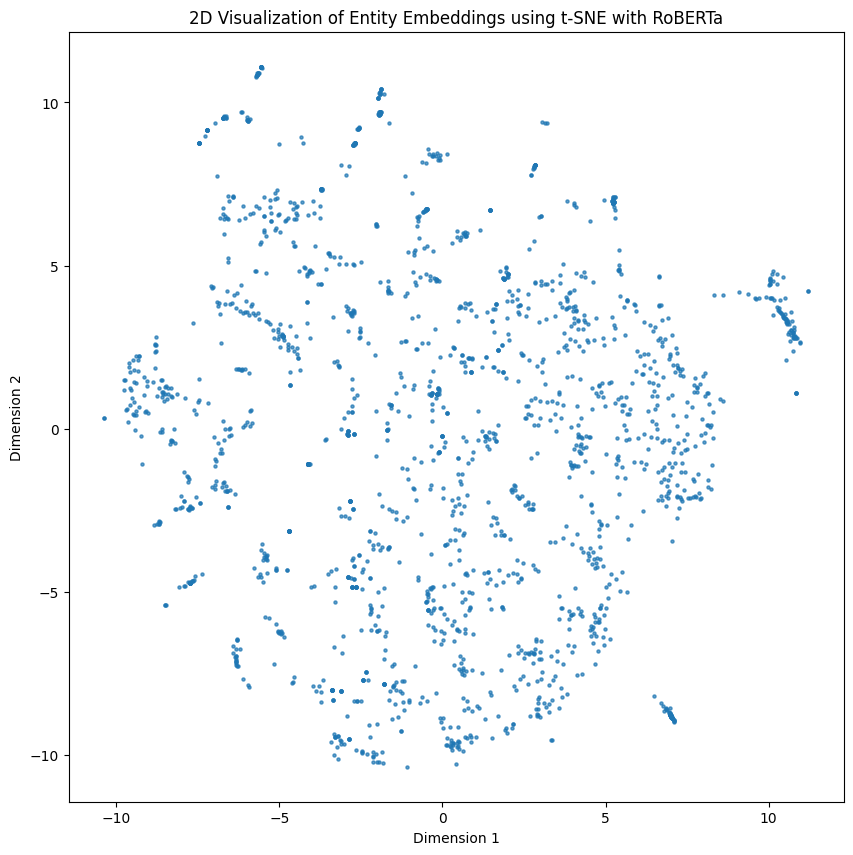

In [28]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

embedding_matrix = entity_embeddings_df.values

pca = PCA(n_components=50)
pca_result = pca.fit_transform(embedding_matrix)

tsne = TSNE(n_components=2, perplexity=30, n_iter=300)
tsne_result = tsne.fit_transform(pca_result)

plt.figure(figsize=(10, 10))
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], s=5, alpha=0.7)
plt.title("2D Visualization of Entity Embeddings using t-SNE with RoBERTa")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.show()


In [29]:
batch_size = 42
relations = codex._load_relations()
relation_dataset = EntityDataset([relations[entity_id]['description'] for entity_id in unique_relations_ids])
relation_dataloader = DataLoader(relation_dataset, batch_size=batch_size, shuffle=False)

In [30]:
all_relation_embeddings = []
for batch in relation_dataloader:
    batch_embeddings = generate_batch_embeddings(batch)
    all_relation_embeddings.extend(batch_embeddings)

relation_embeddings = {relation_id: embedding for relation_id, embedding in zip(unique_relations_ids, all_relation_embeddings)}

import pandas as pd
relation_embeddings_df = pd.DataFrame.from_dict(relation_embeddings, orient="index")
print(relation_embeddings_df.head())

            0         1         2         3         4         5         6    \
P1050 -0.039723  0.102585 -0.009438 -0.082902  0.076260 -0.062558 -0.042153   
P27   -0.047338  0.086639 -0.010363 -0.098668  0.091263 -0.094305 -0.048427   
P800  -0.025495  0.063803 -0.033190 -0.105625  0.080870 -0.067750 -0.052670   
P840  -0.052524  0.074127 -0.032266 -0.087120  0.085371 -0.085719 -0.039053   
P112  -0.064509  0.070534 -0.008071 -0.128422  0.105275 -0.112047 -0.044894   

            7         8         9    ...       758       759       760  \
P1050  0.010024  0.063776 -0.046089  ... -0.009090 -0.010822 -0.061836   
P27    0.031962  0.059242 -0.047650  ...  0.011625 -0.016158 -0.079010   
P800   0.024489  0.031985 -0.065561  ...  0.003787 -0.027375 -0.076782   
P840   0.022754  0.067197 -0.078339  ... -0.005039  0.011462 -0.045651   
P112   0.070390  0.043228 -0.082343  ...  0.003088 -0.016092 -0.101187   

            761       762       763       764       765       766       767  
P1

In [31]:
len(unique_entities_ids), len(all_relation_embeddings)

(2034, 42)

In [32]:
relation_embeddings_df.shape

(42, 768)

In [33]:
relation_embeddings_df.to_csv(f"relation_embeddings.csv", index=True)

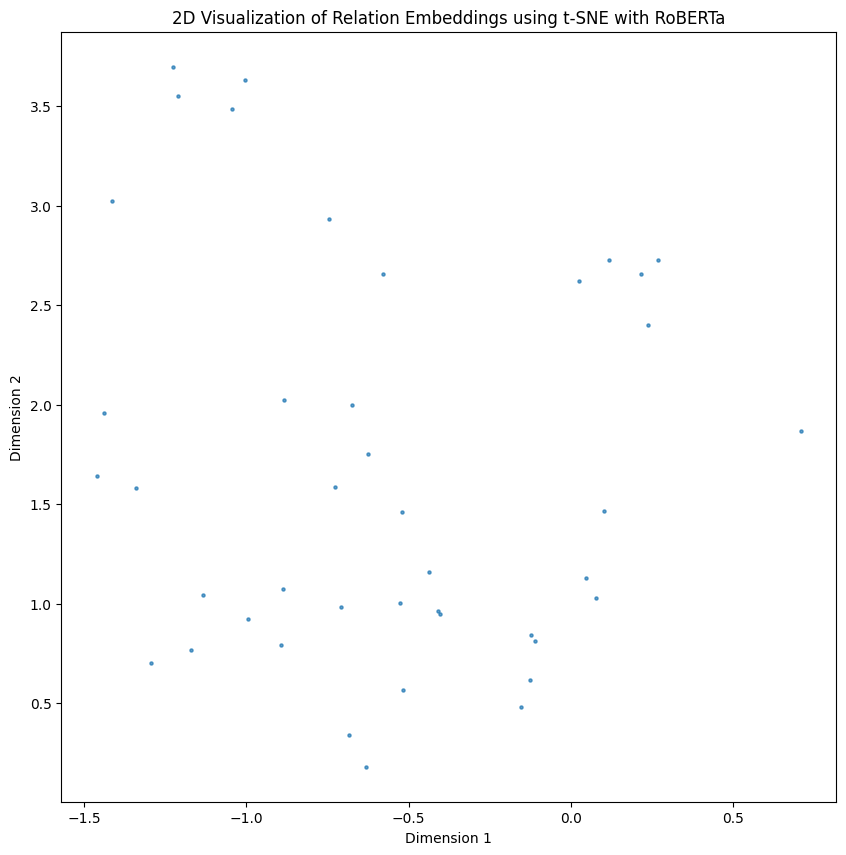

In [34]:
embedding_matrix = relation_embeddings_df.values

pca = PCA(n_components=30)
pca_result = pca.fit_transform(embedding_matrix)

tsne = TSNE(n_components=2, perplexity=30, n_iter=300)
tsne_result = tsne.fit_transform(pca_result)

plt.figure(figsize=(10, 10))
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], s=5, alpha=0.7)
plt.title("2D Visualization of Relation Embeddings using t-SNE with RoBERTa")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.show()


#3. Graph Neural Network Model Design

## GNN Architecture Selection

Used RGCN Model

In [35]:
!pip install torch-geometric

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 23.2 MB/s eta 0:00:00


## Model Implementation

In [36]:
def load_llm_embeddings():
  entity_embeddings_df = pd.read_csv("entity_embeddings.csv", index_col=0)
  relation_embeddings_df = pd.read_csv("relation_embeddings.csv", index_col=0)

  entity_embeddings = torch.tensor(entity_embeddings_df.values, dtype=torch.float32)
  relation_embeddings = torch.tensor(relation_embeddings_df.values, dtype=torch.float32)
  return entity_embeddings, relation_embeddings

def load_random_embeddings(num_entities, num_relations, embedding_dim):
  entity_embeddings = torch.rand((num_entities, embedding_dim), dtype=torch.float32)
  relation_embeddings = torch.rand((num_relations, embedding_dim), dtype=torch.float32)
  return entity_embeddings, relation_embeddings


In [37]:
import torch
import torch.nn.functional as F
from torch_geometric.nn import RGCNConv

class RGCN(torch.nn.Module):
    def __init__(self, entity_embeddings, relation_embeddings, num_relations, embedding_dim, hidden_dim, num_layers=2, dropout=0.2):
        super(RGCN, self).__init__()

        self.node_embeddings = torch.nn.Embedding.from_pretrained(entity_embeddings, freeze=False)
        self.relation_embeddings = torch.nn.Embedding.from_pretrained(relation_embeddings, freeze=False)

        self.embedding_dim = embedding_dim
        self.hidden_dim = hidden_dim

        self.convs = torch.nn.ModuleList()

        self.convs.append(RGCNConv(self.embedding_dim, self.hidden_dim, num_relations))

        for _ in range(num_layers - 2):
            self.convs.append(RGCNConv(self.hidden_dim, self.hidden_dim, num_relations))

        self.convs.append(RGCNConv(self.hidden_dim, self.embedding_dim, num_relations))

        self.dropout = dropout

    def forward(self, edge_index, edge_type):
            x = self.node_embeddings.weight

            rel_embs = self.relation_embeddings(edge_type)  # Shape: (num_edges, embedding_dim)

            # Get source and destination nodes for each edge
            src, dst = edge_index

            # Combine source, destination, and relation embeddings
            src_combined = x[src] * rel_embs  # Shape: (num_edges, embedding_dim)
            dst_combined = x[dst] * rel_embs  # Shape: (num_edges, embedding_dim)
            edge_embeds = src_combined + dst_combined  # Combine src and dst information with relation context

            # Update node embeddings based on edge_embeds (aggregation of edges)
            updated_x = torch.zeros_like(x)
            updated_x = updated_x.index_add(0, src, edge_embeds)  # Aggregate updates from edges to each node
            updated_x = updated_x.index_add(0, dst, edge_embeds)  # Aggregate to both src and dst nodes

            # Use the combined embeddings in RGCN layers
            for conv in self.convs:
                x = conv(updated_x, edge_index, edge_type)
                x = F.relu(x)
                x = F.dropout(x, p=self.dropout, training=self.training)

            return x, self.relation_embeddings.weight
    def score_triplet(self, head_idx, rel_idx, tail_idx):
        # Scoring function: dot product between head, relation, and tail embeddings
        head_emb = self.node_embeddings(head_idx)
        rel_emb = self.relation_embeddings(rel_idx)
        tail_emb = self.node_embeddings(tail_idx)

        score = torch.sum(head_emb * rel_emb * tail_emb, dim=-1)
        return score

    def generate_negative_samples(self, head_idx, rel_idx, tail_idx, num_entities):
        # Create negative samples by randomly corrupting the head or tail
        neg_head_idx = head_idx.clone()
        neg_tail_idx = tail_idx.clone()

        # Generate random mask for head corruption (50% chance to corrupt head)
        head_mask = torch.rand(len(head_idx)) > 0.5
        tail_mask = ~head_mask  # If head is corrupted, tail should not be corrupted

        # Randomly corrupt heads
        neg_head_idx[head_mask] = torch.randint(0, num_entities, (head_mask.sum(),), device=head_idx.device)

        # Randomly corrupt tails
        neg_tail_idx[tail_mask] = torch.randint(0, num_entities, (tail_mask.sum(),), device=tail_idx.device)

        return neg_head_idx, neg_tail_idx

In [38]:
edge_index = torch.tensor([[entity_to_index[head] for head in train['head']],
                           [entity_to_index[tail] for tail in train['tail']]], dtype=torch.long)
edge_type = torch.tensor([relation_to_index[rel] for rel in train['relation']], dtype=torch.long)

#4. Knowledge Base Completion Task

## Training and Testing Setup

In [39]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt

def train_model(model, train_data, val_data, entity_to_index, relation_to_index, optimizer, num_epochs=50, margin=1.0, k_values=[1, 3, 10], device='cpu'):
    """
    Train the model and evaluate on validation data.
    """
    num_entities = len(entity_to_index)
    train_losses = []
    val_losses = []
    val_mrr_scores = []
    val_hits_at_k_scores = {k: [] for k in k_values}

    for epoch in range(num_epochs):
        model.train()
        optimizer.zero_grad()

        # Forward pass
        node_embs, relation_embs = model(edge_index, edge_type)

        # Sample positive triples
        head_idx = torch.tensor([entity_to_index[h] for h in train_data['head']], dtype=torch.long, device=device)
        rel_idx = torch.tensor([relation_to_index[r] for r in train_data['relation']], dtype=torch.long, device=device)
        tail_idx = torch.tensor([entity_to_index[t] for t in train_data['tail']], dtype=torch.long, device=device)

        # Generate negative samples
        neg_head_idx, neg_tail_idx = model.generate_negative_samples(head_idx, rel_idx, tail_idx, num_entities)

        # Calculate positive and negative scores
        pos_scores = model.score_triplet(head_idx, rel_idx, tail_idx)
        neg_scores = model.score_triplet(neg_head_idx, rel_idx, neg_tail_idx)

        # Margin ranking loss
        train_loss = torch.mean(F.relu(margin - pos_scores + neg_scores))

        # Backward pass and optimization
        train_loss.backward()
        optimizer.step()

        # Record train loss
        train_losses.append(train_loss.item())

        # Validation only every 10 epochs
        if (epoch + 1) % 10 == 0:
            model.eval()
            with torch.no_grad():
                val_head_idx = torch.tensor([entity_to_index[h] for h in val_data['head']], dtype=torch.long, device=device)
                val_rel_idx = torch.tensor([relation_to_index[r] for r in val_data['relation']], dtype=torch.long, device=device)
                val_tail_idx = torch.tensor([entity_to_index[t] for t in val_data['tail']], dtype=torch.long, device=device)

                # Generate negative samples for validation
                neg_val_head_idx, neg_val_tail_idx = model.generate_negative_samples(val_head_idx, val_rel_idx, val_tail_idx, num_entities)

                # Calculate validation positive and negative scores
                val_pos_scores = model.score_triplet(val_head_idx, val_rel_idx, val_tail_idx)
                val_neg_scores = model.score_triplet(neg_val_head_idx, val_rel_idx, neg_val_tail_idx)

                # Compute validation loss
                val_loss = torch.mean(F.relu(margin - val_pos_scores + val_neg_scores))
                val_losses.append(val_loss.item())

                # Calculate MRR and Hits@k on validation set
                val_mrr, val_hits_at_k = evaluate_model(model, val_data, entity_to_index, relation_to_index, num_entities, k_values)
                val_mrr_scores.append(val_mrr)

                # Collect Hits@k for specified values of k
                for k in k_values:
                    val_hits_at_k_scores[k].append(val_hits_at_k[k])

                # Print loss and evaluation metrics
                print(f"Epoch {epoch + 1}, Train Loss: {train_loss.item():.4f}, Val Loss: {val_loss.item():.4f}, "
                      f"Val MRR: {val_mrr:.4f}, " + ", ".join([f"Val Hits@{k}: {val_hits_at_k_scores[k][-1]:.4f}" for k in k_values]))

    # Plot training and validation loss
    plt.figure(figsize=(15, 6))

    # Loss Plot
    plt.subplot(1, 2, 1)
    plt.plot(range(1, num_epochs + 1), train_losses, label='Train Loss')
    plt.plot([i for i in range(1, num_epochs + 1) if i % 10 == 0], val_losses, label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()

    # MRR and Hits@k Plot
    plt.subplot(1, 2, 2)
    plt.plot([i for i in range(1, num_epochs + 1) if i % 10 == 0], val_mrr_scores, label='Validation MRR')
    for k in k_values:
        plt.plot([i for i in range(1, num_epochs + 1) if i % 10 == 0], val_hits_at_k_scores[k], label=f'Validation Hits@{k}')
    plt.xlabel('Epochs')
    plt.ylabel('Score')
    plt.title('Validation MRR and Hits@k')
    plt.legend()

    plt.tight_layout()
    plt.show()

    return model


## Evaluation and Metrics

In [40]:
import torch

def evaluate_model(model, test_data, entity_to_index, relation_to_index, num_entities, k_values=[1, 3, 10]):
    """
    Evaluate the model using Mean Reciprocal Rank (MRR) and Hits@k for multiple k values.
    """
    model.eval()  #
    total_mrr = 0.0
    total_hits_at_k = {k: 0 for k in k_values}
    num_samples = len(test_data)

    with torch.no_grad():
        for idx, row in test_data.iterrows():
            head = row['head']
            relation = row['relation']
            true_tail = row['tail']

            head_idx = torch.tensor([entity_to_index[head]], dtype=torch.long)
            rel_idx = torch.tensor([relation_to_index[relation]], dtype=torch.long)
            true_tail_idx = entity_to_index[true_tail]

            # Predict scores for all possible tails
            all_tail_idx = torch.arange(num_entities, dtype=torch.long)
            scores = model.score_triplet(head_idx.repeat(num_entities), rel_idx.repeat(num_entities), all_tail_idx)

            # Sort scores in descending order
            sorted_indices = torch.argsort(scores, descending=True)

            # Calculate rank of the true tail
            rank = (sorted_indices == true_tail_idx).nonzero(as_tuple=True)[0].item() + 1  # Ranks are 1-indexed

            # Calculate MRR
            total_mrr += 1.0 / rank

            # Calculate Hits@k for each k value
            for k in k_values:
                if rank <= k:
                    total_hits_at_k[k] += 1

    # Calculate average MRR and Hits@k for each k
    mrr = total_mrr / num_samples
    hits_at_k = {k: total_hits_at_k[k] / num_samples for k in k_values}

    return mrr, hits_at_k


In [41]:
def get_top_k_tails(model, head, relation, num_entities, k=10):
    head_idx = torch.tensor([entity_to_index[head]], dtype=torch.long)  # Example head
    rel_idx = torch.tensor([relation_to_index[relation]], dtype=torch.long)  # Example relation
    model.eval()
    # Score all possible tails
    all_tail_idx = torch.arange(num_entities, dtype=torch.long)
    scores = model.score_triplet(head_idx.repeat(num_entities), rel_idx.repeat(num_entities), all_tail_idx)

    # Get the top-k tails
    top_k_indices = torch.topk(scores, k=k).indices
    predicted_tails = [list(entity_to_index.keys())[idx] for idx in top_k_indices]
    print(f"Top-{k} predicted tails: {predicted_tails}")

In [42]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

## Hyperparameter Tuning

## Experiment 1

Epoch 10, Train Loss: 2.2390, Val Loss: 2.3811, Val MRR: 0.0087, Val Hits@1: 0.0022, Val Hits@3: 0.0060, Val Hits@10: 0.0060
Epoch 20, Train Loss: 1.0358, Val Loss: 1.2183, Val MRR: 0.0239, Val Hits@1: 0.0022, Val Hits@3: 0.0060, Val Hits@10: 0.0268
Epoch 30, Train Loss: 0.3690, Val Loss: 0.3584, Val MRR: 0.0601, Val Hits@1: 0.0022, Val Hits@3: 0.0060, Val Hits@10: 0.2337
Epoch 40, Train Loss: 0.2364, Val Loss: 0.3273, Val MRR: 0.0795, Val Hits@1: 0.0022, Val Hits@3: 0.0164, Val Hits@10: 0.2841
Epoch 50, Train Loss: 0.1601, Val Loss: 0.2040, Val MRR: 0.1163, Val Hits@1: 0.0093, Val Hits@3: 0.0909, Val Hits@10: 0.3815
Epoch 60, Train Loss: 0.1206, Val Loss: 0.2002, Val MRR: 0.1700, Val Hits@1: 0.0389, Val Hits@3: 0.1834, Val Hits@10: 0.4751
Epoch 70, Train Loss: 0.0983, Val Loss: 0.1774, Val MRR: 0.2303, Val Hits@1: 0.1062, Val Hits@3: 0.2479, Val Hits@10: 0.5140
Epoch 80, Train Loss: 0.0904, Val Loss: 0.1899, Val MRR: 0.2413, Val Hits@1: 0.1221, Val Hits@3: 0.2463, Val Hits@10: 0.5293


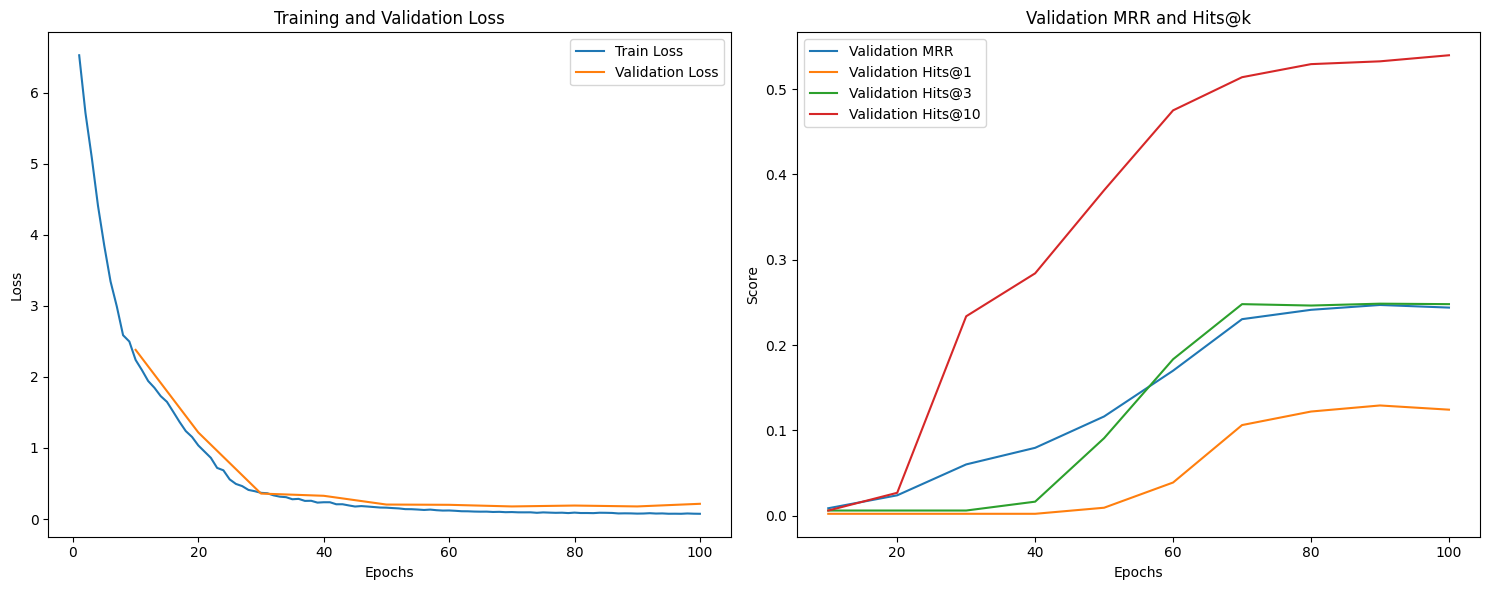

In [ ]:
embedding_dim = entity_embeddings_df.shape[1]
hidden_dim = 768
num_layers = 2
dropout = 0.0
learning_rate = 0.01

entity_embeddings, relation_embeddings = load_llm_embeddings()
model = RGCN(entity_embeddings, relation_embeddings, len(relation_to_index), embedding_dim, hidden_dim, num_layers=num_layers, dropout=dropout)
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

model = train_model(model, train, valid, entity_to_index, relation_to_index, optimizer, num_epochs=100)

In [ ]:
for head, relation in zip(test['head'], test['relation']):
  get_top_k_tails(model, head, relation, num_entities=len(entity_to_index), k=10)


Top-10 predicted tails : ['Q142', 'Q183', 'Q34266', 'Q28513', 'Q30', 'Q43287', 'Q172579', 'Q174193', 'Q41304', 'Q1860']
Top-10 predicted tails : ['Q488205', 'Q639669', 'Q855091', 'Q177220', 'Q486748', 'Q2914170', 'Q19723482', 'Q36834', 'Q183945', 'Q55960555']
Top-10 predicted tails : ['Q2252262', 'Q10798782', 'Q177220', 'Q488205', 'Q36834', 'Q753110', 'Q33999', 'Q5716684', 'Q10800557', 'Q183945']
Top-10 predicted tails : ['Q49084', 'Q8261', 'Q2526255', 'Q333634', 'Q18805', 'Q463281', 'Q4263842', 'Q463303', 'Q193023', 'Q25379']
Top-10 predicted tails : ['Q30', 'Q65', 'Q33999', 'Q177220', 'Q488205', 'Q639669', 'Q23556', 'Q36180', 'Q17172850', 'Q1860']
Top-10 predicted tails : ['Q17172850', 'Q5994', 'Q30', 'Q8355', 'Q177220', 'Q51290', 'Q6607', 'Q488205', 'Q1444', 'Q1860']
Top-10 predicted tails : ['Q4853732', 'Q6625963', 'Q214917', 'Q36180', 'Q49757', 'Q28389', 'Q1028181', 'Q4263842', 'Q333634', 'Q18844224']
Top-10 predicted tails : ['Q11366', 'Q186472', 'Q193355', 'Q206159', 'Q11399', 

In [ ]:
mrr_exp1, hits_at_k_exp1 = evaluate_model(model, test, entity_to_index, relation_to_index, len(entity_to_index))

print(f"Mean Reciprocal Rank (MRR): {mrr_exp1:.4f}")
print(f"Hits@10: {hits_at_k_exp1[10]:.4f}")
print(f"Hits@3: {hits_at_k_exp1[3]:.4f}")
print(f"Hits@1: {hits_at_k_exp1[1]:.4f}")

Mean Reciprocal Rank (MRR): 0.2488
Hits@10: 0.5339
Hits@3: 0.2445
Hits@1: 0.1329


## Experiment 2

Epoch 10, Train Loss: 2.2228, Val Loss: 1.9752, Val MRR: 0.0087, Val Hits@1: 0.0022, Val Hits@3: 0.0060, Val Hits@10: 0.0060
Epoch 20, Train Loss: 1.0746, Val Loss: 0.9718, Val MRR: 0.0237, Val Hits@1: 0.0022, Val Hits@3: 0.0060, Val Hits@10: 0.0213
Epoch 30, Train Loss: 0.3508, Val Loss: 0.3482, Val MRR: 0.0604, Val Hits@1: 0.0022, Val Hits@3: 0.0060, Val Hits@10: 0.2386
Epoch 40, Train Loss: 0.2167, Val Loss: 0.2445, Val MRR: 0.0808, Val Hits@1: 0.0022, Val Hits@3: 0.0159, Val Hits@10: 0.2989
Epoch 50, Train Loss: 0.1567, Val Loss: 0.2031, Val MRR: 0.1207, Val Hits@1: 0.0099, Val Hits@3: 0.1007, Val Hits@10: 0.3968
Epoch 60, Train Loss: 0.1199, Val Loss: 0.2106, Val MRR: 0.1738, Val Hits@1: 0.0356, Val Hits@3: 0.1981, Val Hits@10: 0.4871
Epoch 70, Train Loss: 0.1035, Val Loss: 0.1593, Val MRR: 0.2350, Val Hits@1: 0.1018, Val Hits@3: 0.2616, Val Hits@10: 0.5282
Epoch 80, Train Loss: 0.0860, Val Loss: 0.2014, Val MRR: 0.2555, Val Hits@1: 0.1303, Val Hits@3: 0.2726, Val Hits@10: 0.5468


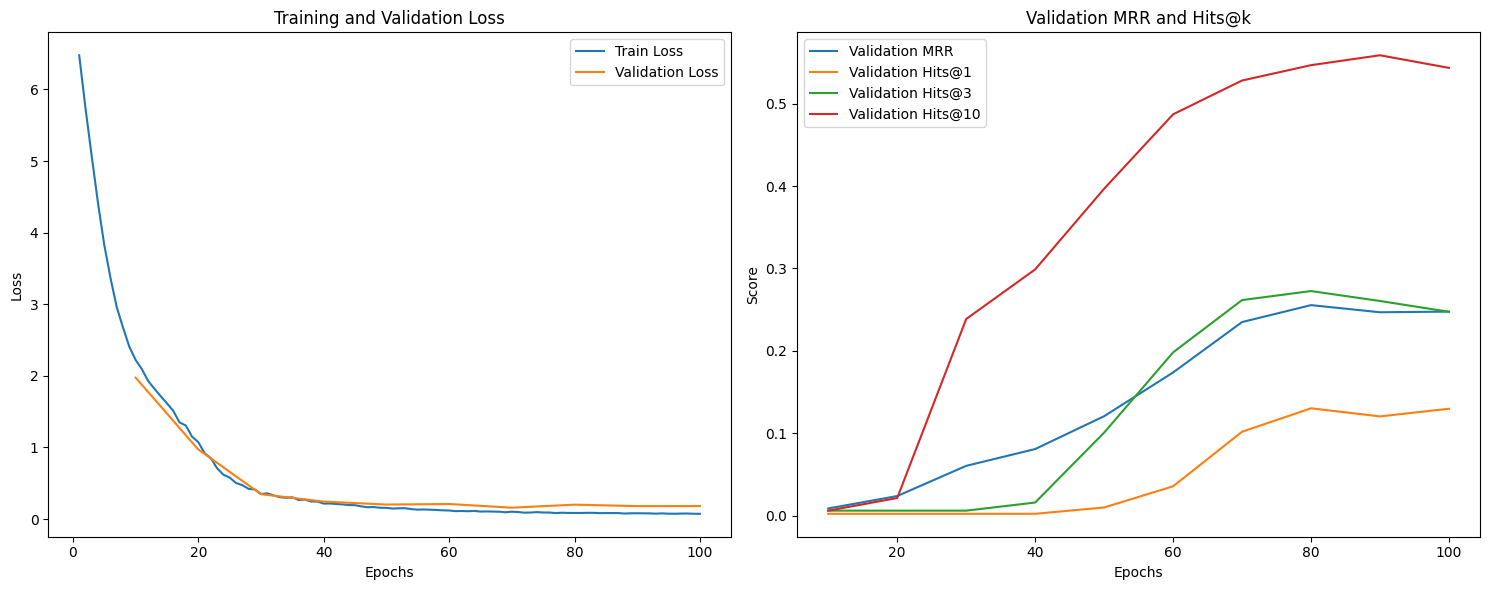

In [ ]:
embedding_dim = entity_embeddings_df.shape[1]
hidden_dim = 512
num_layers = 2
dropout = 0.0
learning_rate = 0.01

entity_embeddings, relation_embeddings = load_llm_embeddings()
model = RGCN(entity_embeddings, relation_embeddings, len(relation_to_index), embedding_dim, hidden_dim, num_layers=num_layers, dropout=dropout)
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

model = train_model(model, train, valid, entity_to_index, relation_to_index, optimizer, num_epochs=100)

In [ ]:
mrr_exp2, hits_at_k_exp2 = evaluate_model(model, test, entity_to_index, relation_to_index, len(entity_to_index))

print(f"Mean Reciprocal Rank (MRR): {mrr_exp2:.4f}")
print(f"Hits@10: {hits_at_k_exp2[10]:.4f}")
print(f"Hits@3: {hits_at_k_exp2[3]:.4f}")
print(f"Hits@1: {hits_at_k_exp2[1]:.4f}")

Mean Reciprocal Rank (MRR): 0.2427
Hits@10: 0.5427
Hits@3: 0.2522
Hits@1: 0.1204


## Experiment 3

Epoch 10, Train Loss: 2.2450, Val Loss: 2.2208, Val MRR: 0.0087, Val Hits@1: 0.0022, Val Hits@3: 0.0060, Val Hits@10: 0.0060
Epoch 20, Train Loss: 1.0658, Val Loss: 0.9595, Val MRR: 0.0237, Val Hits@1: 0.0022, Val Hits@3: 0.0060, Val Hits@10: 0.0224
Epoch 30, Train Loss: 0.3592, Val Loss: 0.4013, Val MRR: 0.0601, Val Hits@1: 0.0022, Val Hits@3: 0.0060, Val Hits@10: 0.2348
Epoch 40, Train Loss: 0.2316, Val Loss: 0.2688, Val MRR: 0.0789, Val Hits@1: 0.0022, Val Hits@3: 0.0126, Val Hits@10: 0.2895
Epoch 50, Train Loss: 0.1539, Val Loss: 0.2024, Val MRR: 0.1155, Val Hits@1: 0.0082, Val Hits@3: 0.0848, Val Hits@10: 0.3924
Epoch 60, Train Loss: 0.1241, Val Loss: 0.1975, Val MRR: 0.1646, Val Hits@1: 0.0285, Val Hits@3: 0.1845, Val Hits@10: 0.4713
Epoch 70, Train Loss: 0.0987, Val Loss: 0.1815, Val MRR: 0.2091, Val Hits@1: 0.0701, Val Hits@3: 0.2315, Val Hits@10: 0.5200
Epoch 80, Train Loss: 0.0888, Val Loss: 0.1635, Val MRR: 0.2382, Val Hits@1: 0.1106, Val Hits@3: 0.2490, Val Hits@10: 0.5441


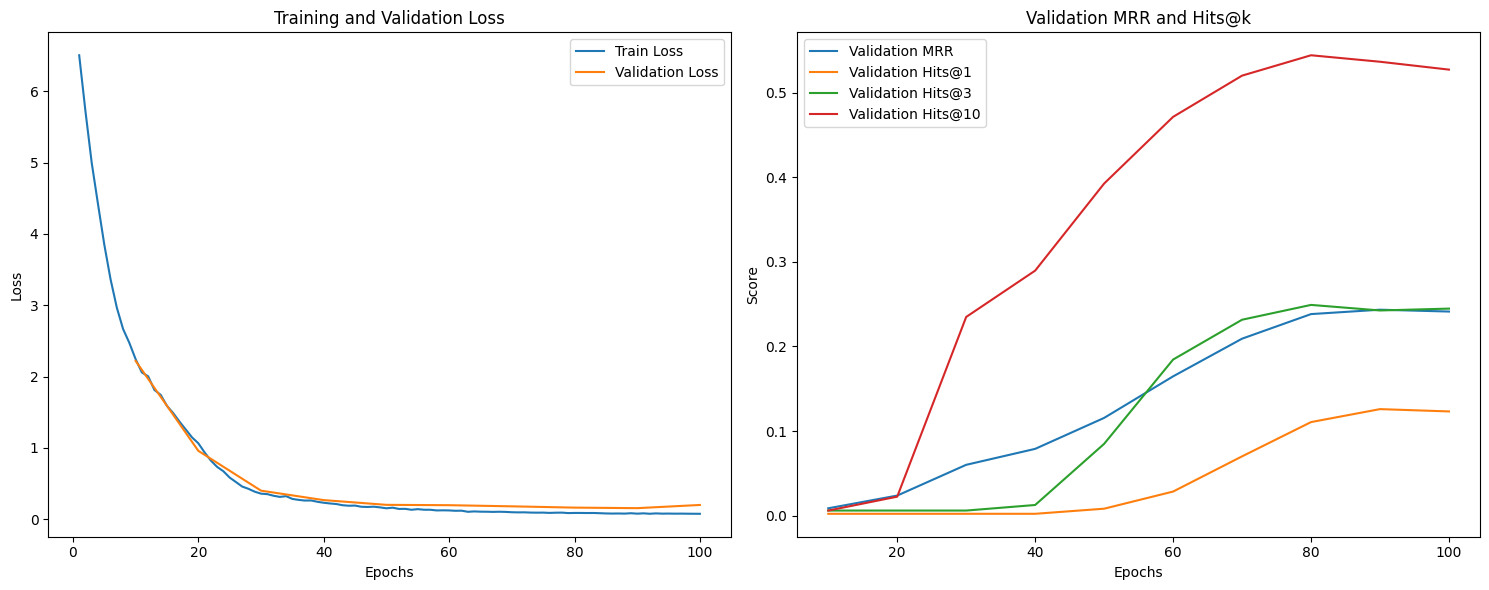

In [ ]:
embedding_dim = entity_embeddings_df.shape[1]
hidden_dim = 768
num_layers = 3
dropout = 0.0
learning_rate = 0.01

entity_embeddings, relation_embeddings = load_llm_embeddings()
model = RGCN(entity_embeddings, relation_embeddings, len(relation_to_index), embedding_dim, hidden_dim, num_layers=num_layers, dropout=dropout)
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

model = train_model(model, train, valid, entity_to_index, relation_to_index, optimizer, num_epochs=100)

In [ ]:
mrr_exp3, hits_at_k_exp3 = evaluate_model(model, test, entity_to_index, relation_to_index, len(entity_to_index))

print(f"Mean Reciprocal Rank (MRR): {mrr_exp3:.4f}")
print(f"Hits@10: {hits_at_k_exp3[10]:.4f}")
print(f"Hits@3: {hits_at_k_exp3[3]:.4f}")
print(f"Hits@1: {hits_at_k_exp3[1]:.4f}")

Mean Reciprocal Rank (MRR): 0.2410
Hits@10: 0.5202
Hits@3: 0.2440
Hits@1: 0.1209


## Experiment 4

Epoch 10, Train Loss: 2.2277, Val Loss: 2.1821, Val MRR: 0.0086, Val Hits@1: 0.0022, Val Hits@3: 0.0060, Val Hits@10: 0.0060
Epoch 20, Train Loss: 1.0383, Val Loss: 1.1483, Val MRR: 0.0233, Val Hits@1: 0.0022, Val Hits@3: 0.0060, Val Hits@10: 0.0252
Epoch 30, Train Loss: 0.3600, Val Loss: 0.3478, Val MRR: 0.0600, Val Hits@1: 0.0022, Val Hits@3: 0.0060, Val Hits@10: 0.2337
Epoch 40, Train Loss: 0.2314, Val Loss: 0.2811, Val MRR: 0.0776, Val Hits@1: 0.0022, Val Hits@3: 0.0126, Val Hits@10: 0.2737
Epoch 50, Train Loss: 0.1547, Val Loss: 0.2386, Val MRR: 0.1127, Val Hits@1: 0.0077, Val Hits@3: 0.0826, Val Hits@10: 0.3777
Epoch 60, Train Loss: 0.1273, Val Loss: 0.2106, Val MRR: 0.1579, Val Hits@1: 0.0241, Val Hits@3: 0.1773, Val Hits@10: 0.4631
Epoch 70, Train Loss: 0.1016, Val Loss: 0.1777, Val MRR: 0.2134, Val Hits@1: 0.0750, Val Hits@3: 0.2332, Val Hits@10: 0.5172
Epoch 80, Train Loss: 0.0882, Val Loss: 0.1979, Val MRR: 0.2546, Val Hits@1: 0.1308, Val Hits@3: 0.2655, Val Hits@10: 0.5616


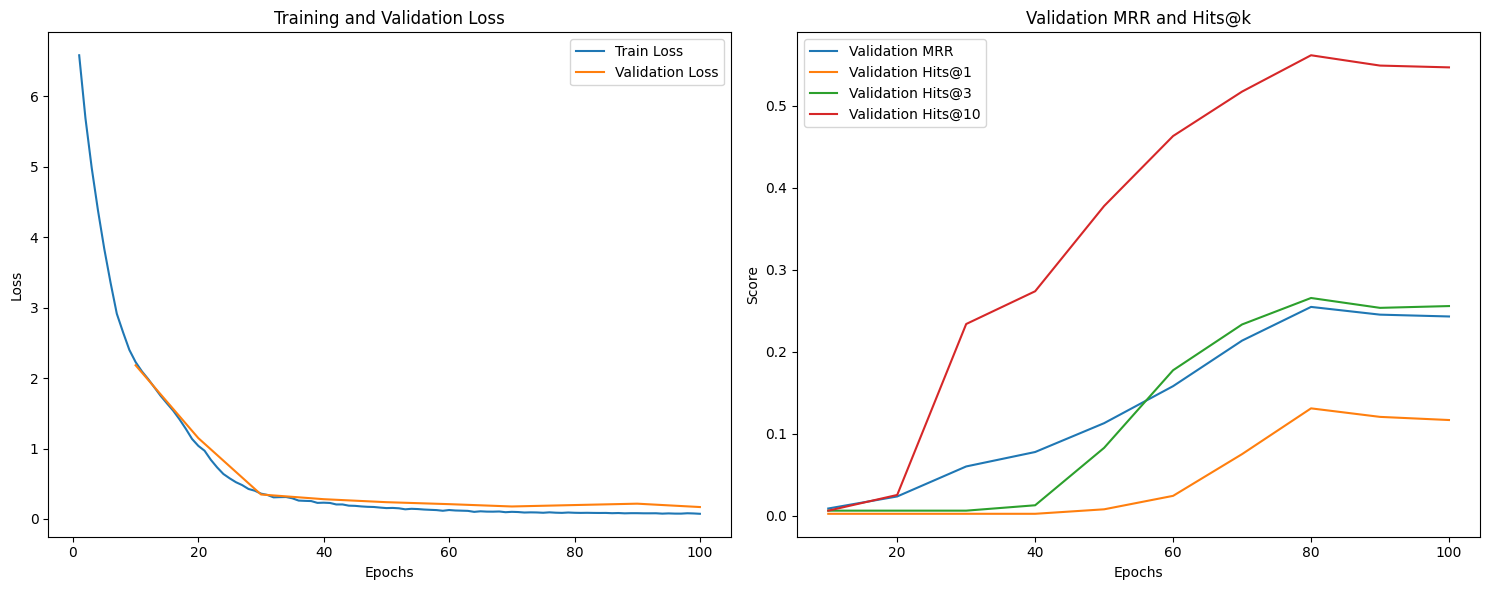

In [ ]:
embedding_dim = entity_embeddings_df.shape[1]
hidden_dim = 768
num_layers = 2
dropout = 0.2
learning_rate = 0.01

entity_embeddings, relation_embeddings = load_llm_embeddings()
model = RGCN(entity_embeddings, relation_embeddings, len(relation_to_index), embedding_dim, hidden_dim, num_layers=num_layers, dropout=dropout)
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

model = train_model(model, train, valid, entity_to_index, relation_to_index, optimizer, num_epochs=100)

In [ ]:
mrr_exp4, hits_at_k_exp4 = evaluate_model(model, test, entity_to_index, relation_to_index, len(entity_to_index))

print(f"Mean Reciprocal Rank (MRR): {mrr_exp4:.4f}")
print(f"Hits@10: {hits_at_k_exp4[10]:.4f}")
print(f"Hits@3: {hits_at_k_exp4[3]:.4f}")
print(f"Hits@1: {hits_at_k_exp4[1]:.4f}")

Mean Reciprocal Rank (MRR): 0.2405
Hits@10: 0.5263
Hits@3: 0.2555
Hits@1: 0.1160


## Experiment 5

Epoch 10, Train Loss: 3.5245, Val Loss: 3.9901, Val MRR: 0.0067, Val Hits@1: 0.0022, Val Hits@3: 0.0060, Val Hits@10: 0.0060
Epoch 20, Train Loss: 2.0336, Val Loss: 2.0014, Val MRR: 0.0088, Val Hits@1: 0.0022, Val Hits@3: 0.0060, Val Hits@10: 0.0060
Epoch 30, Train Loss: 1.2228, Val Loss: 1.1774, Val MRR: 0.0108, Val Hits@1: 0.0022, Val Hits@3: 0.0060, Val Hits@10: 0.0060
Epoch 40, Train Loss: 0.6164, Val Loss: 0.6492, Val MRR: 0.0230, Val Hits@1: 0.0022, Val Hits@3: 0.0060, Val Hits@10: 0.0115
Epoch 50, Train Loss: 0.3202, Val Loss: 0.3437, Val MRR: 0.0541, Val Hits@1: 0.0022, Val Hits@3: 0.0060, Val Hits@10: 0.1730
Epoch 60, Train Loss: 0.2270, Val Loss: 0.2536, Val MRR: 0.0747, Val Hits@1: 0.0022, Val Hits@3: 0.0060, Val Hits@10: 0.2972
Epoch 70, Train Loss: 0.1821, Val Loss: 0.2773, Val MRR: 0.0845, Val Hits@1: 0.0022, Val Hits@3: 0.0060, Val Hits@10: 0.3481
Epoch 80, Train Loss: 0.1430, Val Loss: 0.2277, Val MRR: 0.0908, Val Hits@1: 0.0022, Val Hits@3: 0.0060, Val Hits@10: 0.3914


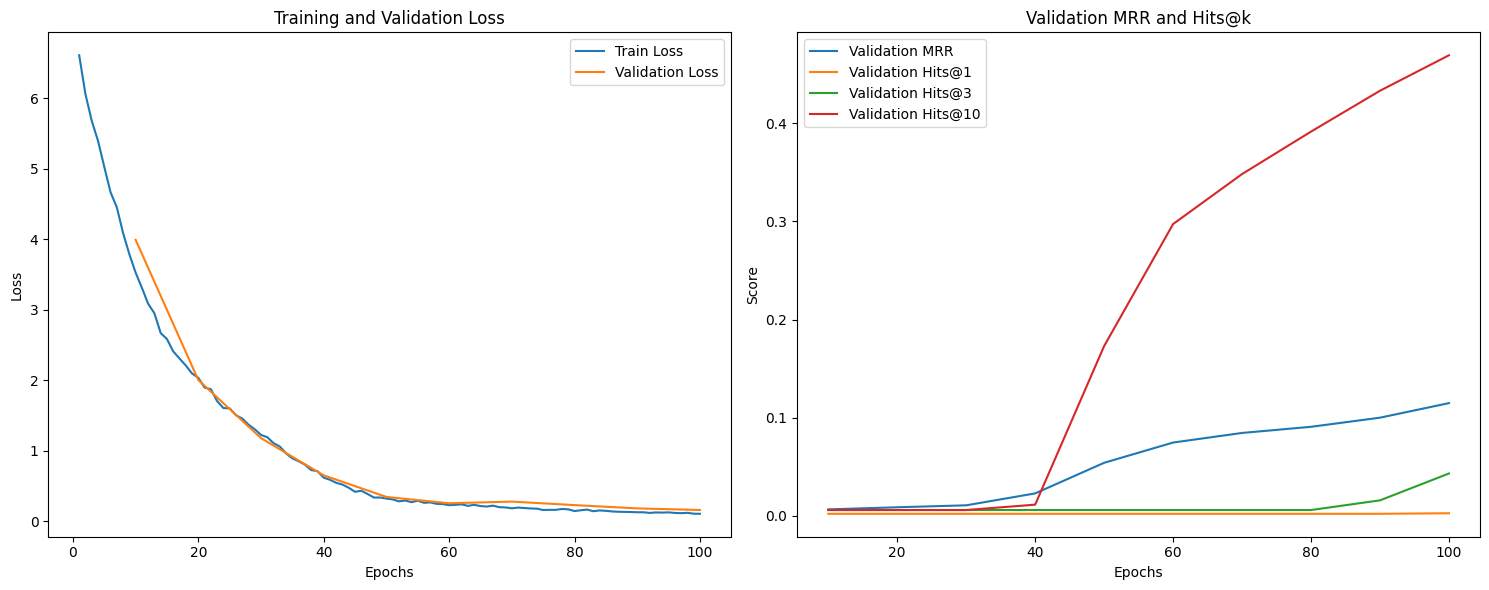

In [ ]:
embedding_dim = entity_embeddings_df.shape[1]
hidden_dim = 768
num_layers = 2
dropout = 0.0
learning_rate = 0.005

entity_embeddings, relation_embeddings = load_llm_embeddings()
model = RGCN(entity_embeddings, relation_embeddings, len(relation_to_index), embedding_dim, hidden_dim, num_layers=num_layers, dropout=dropout)
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

model = train_model(model, train, valid, entity_to_index, relation_to_index, optimizer, num_epochs=100)

In [ ]:
mrr_exp5, hits_at_k_exp5 = evaluate_model(model, test, entity_to_index, relation_to_index, len(entity_to_index))

print(f"Mean Reciprocal Rank (MRR): {mrr_exp5:.4f}")
print(f"Hits@10: {hits_at_k_exp5[10]:.4f}")
print(f"Hits@3: {hits_at_k_exp5[3]:.4f}")
print(f"Hits@1: {hits_at_k_exp5[1]:.4f}")

Mean Reciprocal Rank (MRR): 0.1129
Hits@10: 0.4721
Hits@3: 0.0361
Hits@1: 0.0016


## Experiment 6

Epoch 10, Train Loss: 0.7401, Val Loss: 0.7240, Val MRR: 0.1746, Val Hits@1: 0.1040, Val Hits@3: 0.1877, Val Hits@10: 0.3136
Epoch 20, Train Loss: 0.3903, Val Loss: 0.5293, Val MRR: 0.2013, Val Hits@1: 0.0941, Val Hits@3: 0.2129, Val Hits@10: 0.4215
Epoch 30, Train Loss: 0.2903, Val Loss: 0.5596, Val MRR: 0.2037, Val Hits@1: 0.0985, Val Hits@3: 0.2058, Val Hits@10: 0.4308
Epoch 40, Train Loss: 0.2218, Val Loss: 0.5966, Val MRR: 0.2146, Val Hits@1: 0.1067, Val Hits@3: 0.2206, Val Hits@10: 0.4669
Epoch 50, Train Loss: 0.1907, Val Loss: 0.4748, Val MRR: 0.2198, Val Hits@1: 0.1062, Val Hits@3: 0.2255, Val Hits@10: 0.4888
Epoch 60, Train Loss: 0.1630, Val Loss: 0.6646, Val MRR: 0.2202, Val Hits@1: 0.1149, Val Hits@3: 0.2157, Val Hits@10: 0.4669
Epoch 70, Train Loss: 0.1465, Val Loss: 0.4378, Val MRR: 0.2078, Val Hits@1: 0.0985, Val Hits@3: 0.2042, Val Hits@10: 0.4767
Epoch 80, Train Loss: 0.1408, Val Loss: 0.5493, Val MRR: 0.1968, Val Hits@1: 0.0859, Val Hits@3: 0.1916, Val Hits@10: 0.4735


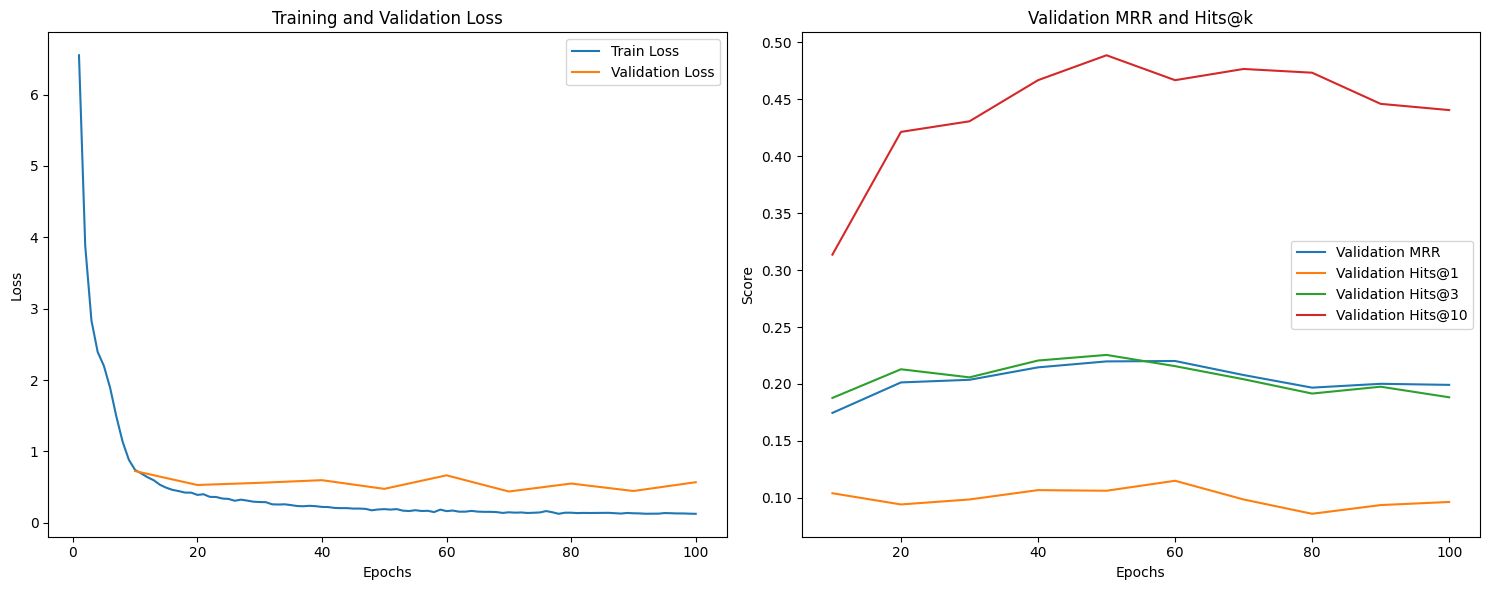

In [ ]:
embedding_dim = entity_embeddings_df.shape[1]
hidden_dim = 768
num_layers = 2
dropout = 0.0
learning_rate = 0.05

entity_embeddings, relation_embeddings = load_llm_embeddings()
model = RGCN(entity_embeddings, relation_embeddings, len(relation_to_index), embedding_dim, hidden_dim, num_layers=num_layers, dropout=dropout)
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

model = train_model(model, train, valid, entity_to_index, relation_to_index, optimizer, num_epochs=100)

In [ ]:
for head, relation in zip(test['head'], test['relation']):
  print(head, relation)

array([False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False])

In [ ]:
mrr_exp6, hits_at_k_exp6 = evaluate_model(model, test, entity_to_index, relation_to_index, len(entity_to_index))

print(f"Mean Reciprocal Rank (MRR): {mrr_exp6:.4f}")
print(f"Hits@10: {hits_at_k_exp6[10]:.4f}")
print(f"Hits@3: {hits_at_k_exp6[3]:.4f}")
print(f"Hits@1: {hits_at_k_exp6[1]:.4f}")

Mean Reciprocal Rank (MRR): 0.1921
Hits@10: 0.4223
Hits@3: 0.1800
Hits@1: 0.0925


## Experiment 7

Epoch 10, Train Loss: 0.5730, Val Loss: 0.8141, Val MRR: 0.0685, Val Hits@1: 0.0000, Val Hits@3: 0.0728, Val Hits@10: 0.1894
Epoch 20, Train Loss: 0.2729, Val Loss: 0.6571, Val MRR: 0.0753, Val Hits@1: 0.0000, Val Hits@3: 0.0783, Val Hits@10: 0.2392
Epoch 30, Train Loss: 0.1779, Val Loss: 0.6051, Val MRR: 0.0810, Val Hits@1: 0.0000, Val Hits@3: 0.0843, Val Hits@10: 0.2288
Epoch 40, Train Loss: 0.1390, Val Loss: 0.5525, Val MRR: 0.0835, Val Hits@1: 0.0000, Val Hits@3: 0.0969, Val Hits@10: 0.2447
Epoch 50, Train Loss: 0.1108, Val Loss: 0.5460, Val MRR: 0.0763, Val Hits@1: 0.0000, Val Hits@3: 0.0826, Val Hits@10: 0.2140
Epoch 60, Train Loss: 0.1061, Val Loss: 0.5470, Val MRR: 0.0734, Val Hits@1: 0.0000, Val Hits@3: 0.0794, Val Hits@10: 0.2031
Epoch 70, Train Loss: 0.0890, Val Loss: 0.5134, Val MRR: 0.0678, Val Hits@1: 0.0000, Val Hits@3: 0.0722, Val Hits@10: 0.1801
Epoch 80, Train Loss: 0.0846, Val Loss: 0.5526, Val MRR: 0.0636, Val Hits@1: 0.0000, Val Hits@3: 0.0662, Val Hits@10: 0.1697


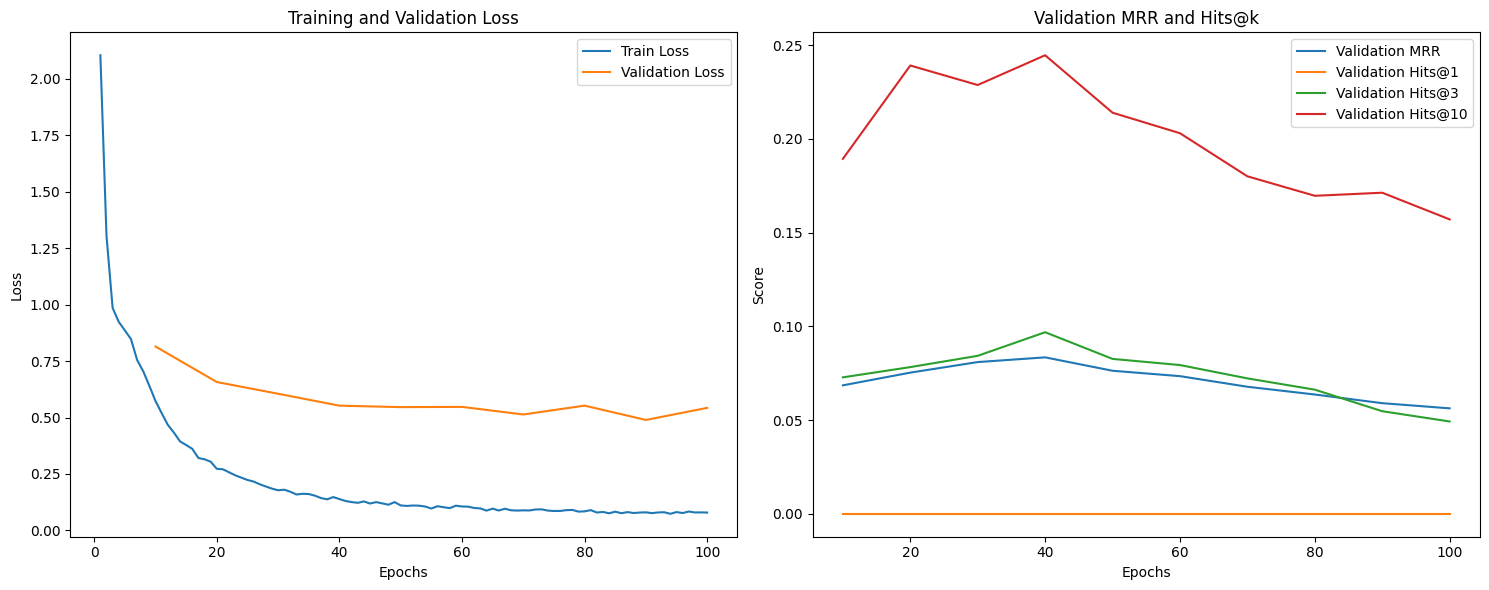

In [ ]:
embedding_dim = entity_embeddings_df.shape[1]
num_layers = 2
dropout = 0.0
learning_rate = 0.01

entity_embeddings, relation_embeddings = load_random_embeddings(num_entities=len(entity_to_index), num_relations=len(relation_to_index), embedding_dim=embedding_dim)
model = RGCN(entity_embeddings, relation_embeddings, len(relation_to_index), embedding_dim, hidden_dim, num_layers=num_layers, dropout=dropout)
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

model = train_model(model, train, valid, entity_to_index, relation_to_index, optimizer, num_epochs=100)

In [ ]:
for head, relation in zip(test['head'], test['relation']):
  get_top_k_tails(model, head, relation, num_entities=len(entity_to_index), k=10)


Top-10 predicted tails : ['Q206832', 'Q357455', 'Q168419', 'Q107405', 'Q453288', 'Q6711', 'Q30', 'Q379580', 'Q39', 'Q145']
Top-10 predicted tails : ['Q319374', 'Q639669', 'Q486748', 'Q177220', 'Q855091', 'Q488205', 'Q230395', 'Q312252', 'Q10800557', 'Q39989']
Top-10 predicted tails : ['Q38875', 'Q10798782', 'Q10800557', 'Q753110', 'Q33999', 'Q36834', 'Q488205', 'Q215026', 'Q3282637', 'Q177220']
Top-10 predicted tails : ['Q115483', 'Q25379', 'Q32849', 'Q151593', 'Q82222', 'Q957627', 'Q162202', 'Q162667', 'Q107424', 'Q1988375']
Top-10 predicted tails : ['Q239652', 'Q217427', 'Q232592', 'Q50020', 'Q158060', 'Q57075', 'Q188648', 'Q282722', 'Q184440', 'Q151972']
Top-10 predicted tails : ['Q122003', 'Q17172850', 'Q311672', 'Q1586454', 'Q361677', 'Q319374', 'Q5105', 'Q228792', 'Q57139', 'Q130742']
Top-10 predicted tails : ['Q34970', 'Q1028181', 'Q36180', 'Q6625963', 'Q217557', 'Q49757', 'Q28389', 'Q333634', 'Q151830', 'Q22670']
Top-10 predicted tails : ['Q289003', 'Q193355', 'Q215215', 'Q113

In [ ]:
mrr_exp7, hits_at_k_exp7 = evaluate_model(model, test, entity_to_index, relation_to_index, len(entity_to_index))

print(f"Mean Reciprocal Rank (MRR): {mrr_exp7:.4f}")
print(f"Hits@10: {hits_at_k_exp7[10]:.4f}")
print(f"Hits@3: {hits_at_k_exp7[3]:.4f}")
print(f"Hits@1: {hits_at_k_exp7[1]:.4f}")

Mean Reciprocal Rank (MRR): 0.0519
Hits@10: 0.1389
Hits@3: 0.0427
Hits@1: 0.0000


In [ ]:
mrr_exp1 = 0.2488
mrr_exp2 = 0.2427
mrr_exp3 = 0.2410
mrr_exp4 = 0.2405
mrr_exp5 = 0.1129
mrr_exp6 = 0.1921
mrr_exp7 = 0.0519

hits_at_k_exp1 = {1: 0.1329, 3: 0.2445, 10: 0.5339}
hits_at_k_exp2 = {1: 0.1204, 3: 0.2522, 10: 0.5427}
hits_at_k_exp3 = {1: 0.1209, 3: 0.2440, 10: 0.5202}
hits_at_k_exp4 = {1: 0.1160, 3: 0.2555, 10: 0.5263}
hits_at_k_exp5 = {1: 0.0016, 3: 0.0361, 10: 0.4721}
hits_at_k_exp6 = {1: 0.0925, 3: 0.1800, 10: 0.4223}
hits_at_k_exp7 = {1: 0.0000, 3: 0.0427, 10: 0.1389}

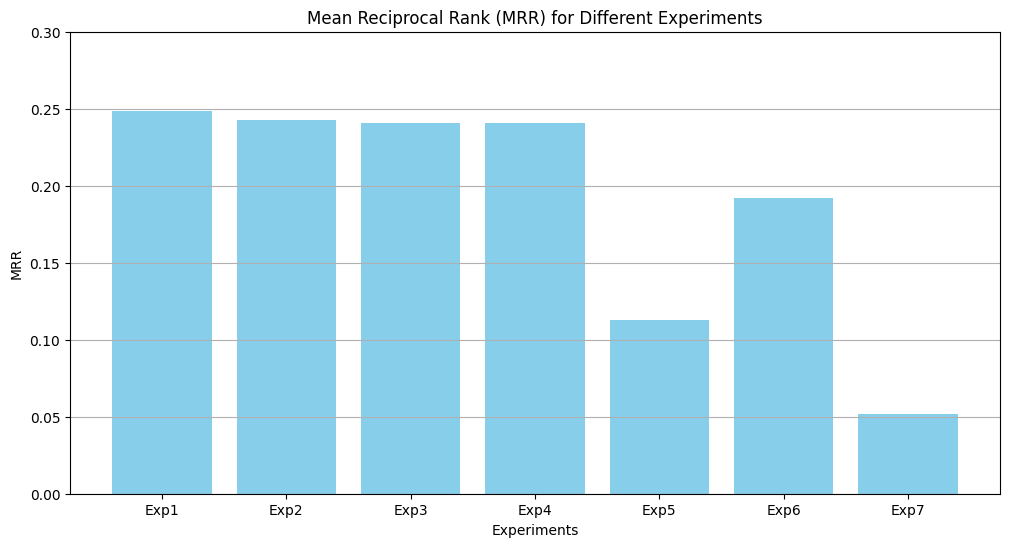

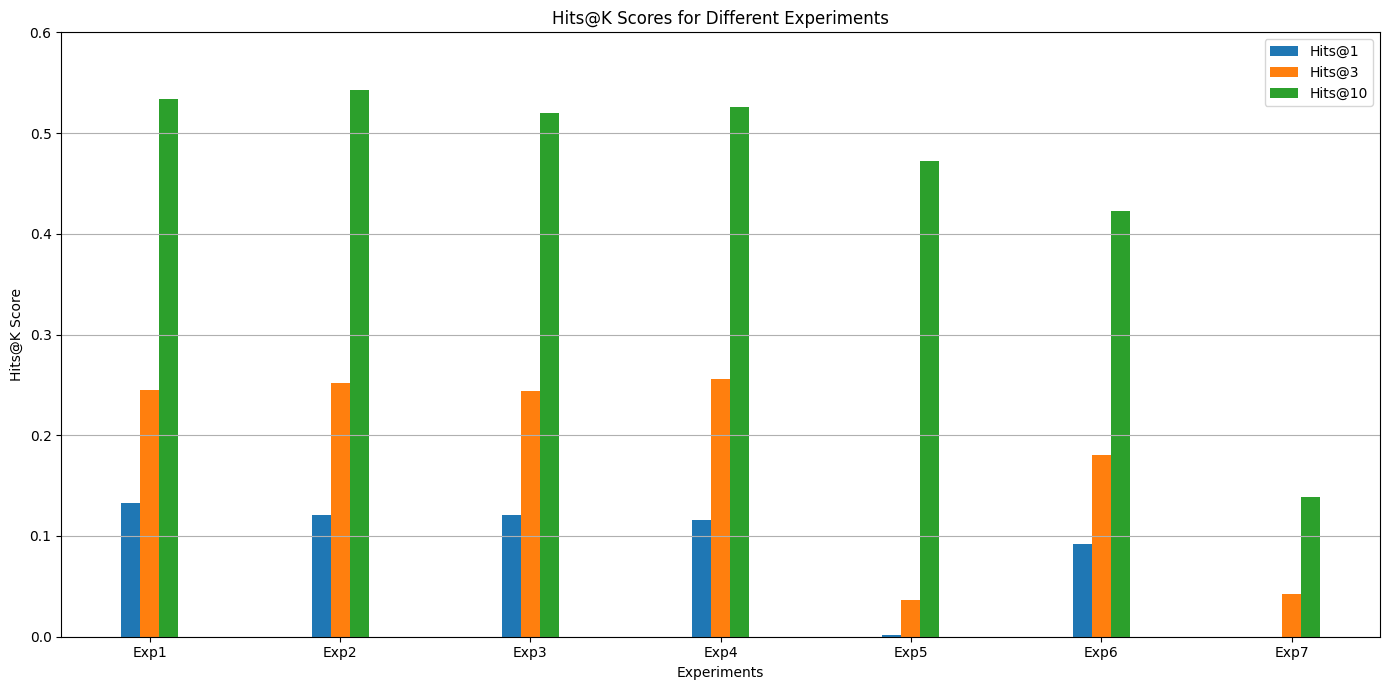

In [ ]:
experiments = ['Exp1', 'Exp2', 'Exp3', 'Exp4','Exp5', 'Exp6', 'Exp7']
mrr_values = [mrr_exp1, mrr_exp2, mrr_exp3, mrr_exp4, mrr_exp5, mrr_exp6, mrr_exp7]
hits_at_k_values = {"Exp1": hits_at_k_exp1, "Exp2": hits_at_k_exp2, "Exp3": hits_at_k_exp3, "Exp4": hits_at_k_exp4, "Exp5": hits_at_k_exp5,
                    "Exp6": hits_at_k_exp6, "Exp7": hits_at_k_exp7}
# Plotting MRR
plt.figure(figsize=(12, 6))
plt.bar(experiments, mrr_values, color='skyblue')
plt.xlabel('Experiments')
plt.ylabel('MRR')
plt.title('Mean Reciprocal Rank (MRR) for Different Experiments')
plt.ylim(0, 0.3)
plt.grid(axis='y')

# Hits@K Plot
hits_at_k = [1, 3, 10]
width = 0.1  # Bar width
x = np.arange(len(experiments))
plt.show()
plt.figure(figsize=(14, 7))
for idx, k in enumerate(hits_at_k):
    hits_values = [hits_at_k_values[exp][k] for exp in experiments]
    plt.bar(x + idx * width, hits_values, width, label=f'Hits@{k}')

plt.xlabel('Experiments')
plt.ylabel('Hits@K Score')
plt.title('Hits@K Scores for Different Experiments')
plt.xticks(x + width, experiments)
plt.ylim(0, 0.6)
plt.legend()
plt.grid(axis='y')

plt.tight_layout()
plt.show()

# Analysis of LLM Embedding and Random Embeddings

In [43]:
print(test.head(10)[['head', 'relation']])

      head relation
0  Q206832      P27
1  Q319374     P106
2   Q38875     P106
3  Q115483     P136
4  Q239652     P740
5  Q122003    P1303
6   Q34970     P106
7  Q289003     P136
8  Q188137     P106
9     Q833     P530


In [44]:
# LLM-based embeddings predictions
llm_predictions = {
    ('Q206832', 'P27'): ['Q142', 'Q183', 'Q34266', 'Q28513', 'Q30', 'Q43287', 'Q172579', 'Q174193', 'Q41304', 'Q1860'],
    ('Q319374', 'P106'): ['Q488205', 'Q639669', 'Q855091', 'Q177220', 'Q486748', 'Q2914170', 'Q19723482', 'Q36834', 'Q183945', 'Q55960555'],
    ('Q38875', 'P106'): ['Q2252262', 'Q10798782', 'Q177220', 'Q488205', 'Q36834', 'Q753110', 'Q33999', 'Q5716684', 'Q10800557', 'Q183945'],
    ('Q115483', 'P136'): ['Q49084', 'Q8261', 'Q2526255', 'Q333634', 'Q18805', 'Q463281', 'Q4263842', 'Q463303', 'Q193023', 'Q25379'],
    ('Q239652', 'P740'): ['Q30', 'Q65', 'Q33999', 'Q177220', 'Q488205', 'Q639669', 'Q23556', 'Q36180', 'Q17172850', 'Q1860'],
    ('Q122003', 'P1303'): ['Q17172850', 'Q5994', 'Q30', 'Q8355', 'Q177220', 'Q51290', 'Q6607', 'Q488205', 'Q1444', 'Q1860'],
    ('Q34970', 'P106'): ['Q4853732', 'Q6625963', 'Q214917', 'Q36180', 'Q49757', 'Q28389', 'Q1028181', 'Q4263842', 'Q333634', 'Q18844224'],
    ('Q289003', 'P136'): ['Q11366', 'Q186472', 'Q193355', 'Q206159', 'Q11399', 'Q9759', 'Q83270', 'Q43343', 'Q1641839', 'Q8341'],
    ('Q188137', 'P106'): ['Q2526255', 'Q3282637', 'Q1053574', 'Q28389', 'Q1415090', 'Q578109', 'Q7042855', 'Q36834', 'Q33999', 'Q36180'],
    ('Q833', 'P530'): ['Q241', 'Q414', 'Q902', 'Q819', 'Q403', 'Q843', 'Q34', 'Q41', 'Q159', 'Q399']
}

# Random initialization predictions
random_predictions = {
    ('Q206832', 'P27'): ['Q206832', 'Q357455', 'Q168419', 'Q107405', 'Q453288', 'Q6711', 'Q30', 'Q379580', 'Q39', 'Q145'],
    ('Q319374', 'P106'): ['Q319374', 'Q639669', 'Q486748', 'Q177220', 'Q855091', 'Q488205', 'Q230395', 'Q312252', 'Q10800557', 'Q39989'],
    ('Q38875', 'P106'): ['Q38875', 'Q10798782', 'Q10800557', 'Q753110', 'Q33999', 'Q36834', 'Q488205', 'Q215026', 'Q3282637', 'Q177220'],
    ('Q115483', 'P136'): ['Q115483', 'Q25379', 'Q32849', 'Q151593', 'Q82222', 'Q957627', 'Q162202', 'Q162667', 'Q107424', 'Q1988375'],
    ('Q239652', 'P740'): ['Q239652', 'Q217427', 'Q232592', 'Q50020', 'Q158060', 'Q57075', 'Q188648', 'Q282722', 'Q184440', 'Q151972'],
    ('Q122003', 'P1303'): ['Q122003', 'Q17172850', 'Q311672', 'Q1586454', 'Q361677', 'Q319374', 'Q5105', 'Q228792', 'Q57139', 'Q130742'],
    ('Q34970', 'P106'): ['Q34970', 'Q1028181', 'Q36180', 'Q6625963', 'Q217557', 'Q49757', 'Q28389', 'Q333634', 'Q151830', 'Q22670'],
    ('Q289003', 'P136'): ['Q289003', 'Q193355', 'Q215215', 'Q11399', 'Q636', 'Q189599', 'Q229153', 'Q192655', 'Q299138', 'Q1133657'],
    ('Q188137', 'P106'): ['Q188137', 'Q33999', 'Q36180', 'Q578109', 'Q10800557', 'Q37944', 'Q2526255', 'Q3282637', 'Q28389', 'Q1415090'],
    ('Q833', 'P530'): ['Q833', 'Q574', 'Q668', 'Q717', 'Q43', 'Q902', 'Q948', 'Q884', 'Q408', 'Q183']
}


In [45]:
def compare_predictions(llm_preds, random_preds, true_tail):
    comparison_results = {}

    for idx, key in enumerate(llm_preds):
        llm_flag=0
        random_flag=0
        llm_set = set(llm_preds[key])
        random_set = set(random_preds[key])
        if true_tail[idx] in llm_set:
          llm_flag=1
        if true_tail[idx] in random_set:
          random_flag=1

        # Find common predictions between the two
        common_preds = llm_set.intersection(random_set)

        # Calculate the number of common predictions and the unique ones in both sets
        comparison_results[key] = {
            "common_predictions": list(common_preds),
            "llm_unique": list(llm_set - random_set),
            "random_unique": list(random_set - llm_set),
            "common_count": len(common_preds),
            "llm_flag": llm_flag,
            "random_flag": random_flag,
            "head": entities[key[0]]['description'],
            "relation": relations[key[1]]['description'],
            "tail": entities[true_tail[idx]]['description']
        }


    return comparison_results

comparison = compare_predictions(llm_predictions, random_predictions, list(test.head(10)['tail']))

for key, result in comparison.items():
    print(f"Comparison for ({key}):")
    print(f"  Common Predictions: {result['common_predictions']}")
    print(f"  LLM Unique: {result['llm_unique']}")
    print(f"  Random Unique: {result['random_unique']}")
    print(f"  Common Count: {result['common_count']}")
    if result['llm_flag']==1:
      print("LLM Correct")
    else:
      print("LLM Incorrect")
    if result['random_flag']==1:
      print("Random Correct")

    else:
      print("Random Incorrect")
    print('Head: ', result['head'])
    print('Relation: ', result['relation'])
    print('Tail: ', result['tail'])
    print()
    print("-" * 50)


Comparison for (('Q206832', 'P27')):
  Common Predictions: ['Q30']
  LLM Unique: ['Q142', 'Q43287', 'Q41304', 'Q183', 'Q34266', 'Q174193', 'Q172579', 'Q28513', 'Q1860']
  Random Unique: ['Q357455', 'Q6711', 'Q206832', 'Q453288', 'Q168419', 'Q39', 'Q107405', 'Q145', 'Q379580']
  Common Count: 1
LLM Correct
Random Incorrect
Head:  French mathematician, inventor of descriptive geometry and father of differential geometry
Relation:  the object is a country that recognizes the subject as its citizen
Tail:  republic with mainland in Europe and numerous oversea territories

--------------------------------------------------
Comparison for (('Q319374', 'P106')):
  Common Predictions: ['Q488205', 'Q177220', 'Q486748', 'Q639669', 'Q855091']
  LLM Unique: ['Q183945', 'Q55960555', 'Q19723482', 'Q2914170', 'Q36834']
  Random Unique: ['Q319374', 'Q10800557', 'Q312252', 'Q39989', 'Q230395']
  Common Count: 5
LLM Correct
Random Incorrect
Head:  American singer-songwriter, guitarist, pianist and sessio